**Chapter05 - 2 | Summary**  
  
`matplotlib`과 `seaborn`을 활용해 자료를 시각화하여 기술통계만으로 알기 힘든 패턴과 이상한 점을 찾아낸다  
  
* Contents🔍  
    5. 이변량 관계 조사 : 산점도
    6. 연속변수 추세 조사 : 라인 플롯
    7. 상관행렬 시각화 : 히트맵

# Scatter plot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [6]:
pd.set_option('display.width', 80)
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use(['default'])
# plt.rcParams['axes.facecolor'] = 'white' # Color of Plot's Background 

In [7]:
# 1. read data : ![image-2.png](attachment:image-2.png)2019 world average temperature (12,095 countries)
landtemps = pd.read_csv('data/landtemps2019avgs.csv')
landtemps.head(2)

,locationid,station,countryid,country,latabs,elevation,avgtemp
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.33,34.00,28.25
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.25,10.40,29.59


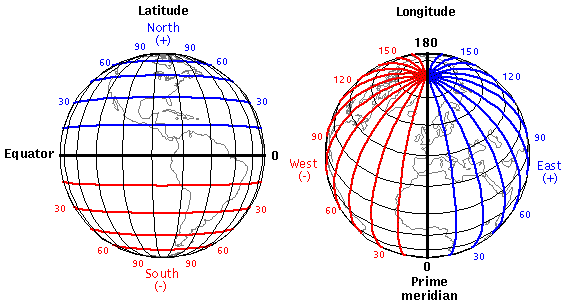

## **scatter plot**

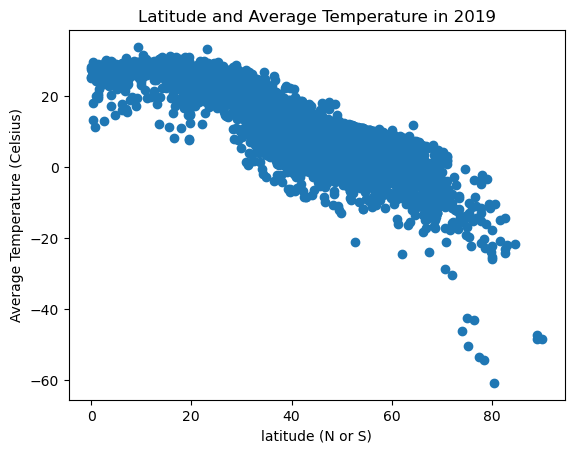

In [8]:
# 1. scatter plot - avgtemp by latitude
plt.scatter(x='latabs', y='avgtemp', data=landtemps)
plt.xlabel('latitude (N or S)')
plt.ylabel('Average Temperature (Celsius)')
plt.yticks(np.arange(-60, 40, step=20))
plt.title('Latitude and Average Temperature in 2019')
plt.show()

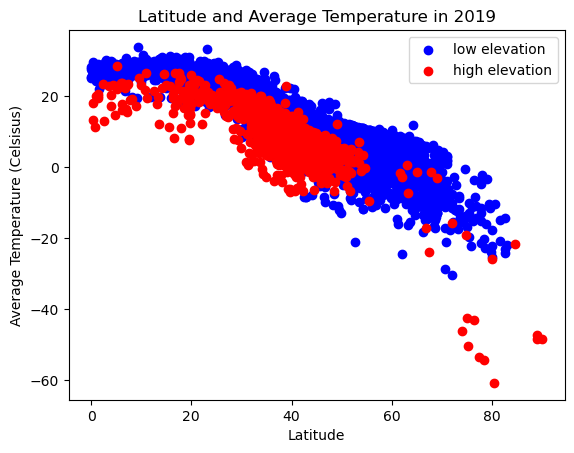

In [9]:
# 2-1. show elevation levels in a different color
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
plt.scatter(x='latabs', y='avgtemp', c='blue', data=low) # low latitude = blue
plt.scatter(x='latabs', y='avgtemp', c='red', data=high) # high latitude = red
# plt.legend() # blank means "print label"
# plt.legend() # blank means "print y-axis (if label doesn't exist)"
plt.legend(('low elevation', 'high elevation')) # write legend names in the order in which plots were created
plt.xlabel('Latitude')
plt.ylabel('Average Temperature (Celsisus)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

## **3D scatter plot**

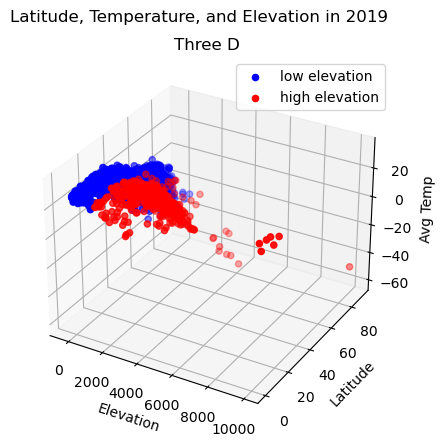

In [10]:
# 3. scatter plot with a regression line
fig = plt.figure() # set canvas
plt.suptitle('Latitude, Temperature, and Elevation in 2019')
ax = plt.axes(projection='3d') # set axis
ax.set_title('Three D')
ax.set_xlabel('Elevation')
ax.set_ylabel('Latitude')
ax.set_zlabel('Avg Temp')
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label='low elevation', c='blue')
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label='high elevation', c='red')
ax.legend()
plt.show()

**중간 과정**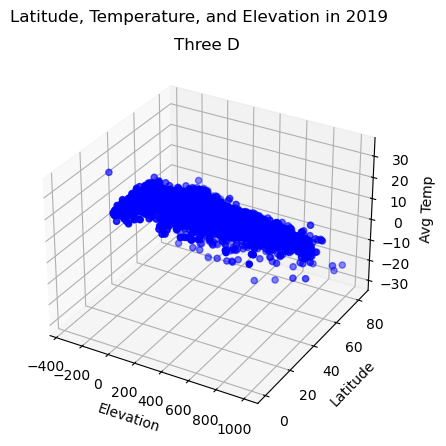 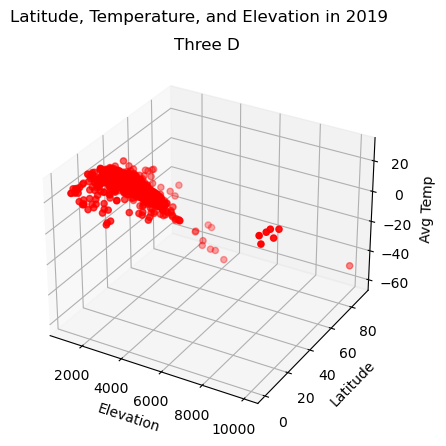

## with **regression line**
* regplot(), lmplot() 두 메서드의 기능은 비슷함  

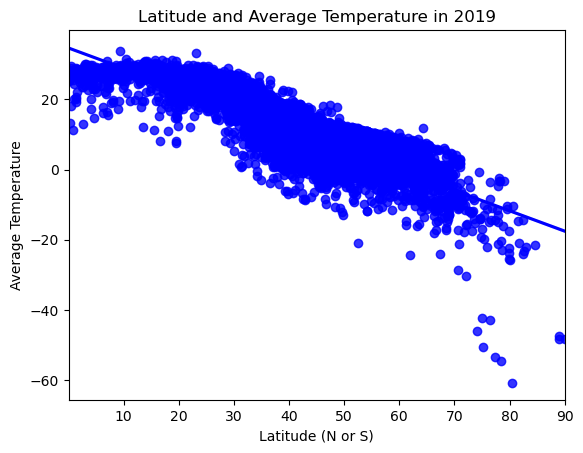

In [11]:
# 4. show a regression line
sns.regplot(x='latabs', y='avgtemp', color='blue', data=landtemps)
plt.title('Latitude and Average Temperature in 2019')
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature')
plt.show()

In [12]:
# 5. show different regression lines by elevation group
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000, 'low', 'high')
landtemps.head(3)

,locationid,station,countryid,country,latabs,elevation,avgtemp,elevation_group
0,AE000041196,SHARJAH_INTER_AIRP,AE,United Arab Emirates,25.33,34.00,28.25,low
1,AEM00041194,DUBAI_INTL,AE,United Arab Emirates,25.25,10.40,29.59,low
2,AEM00041217,ABU_DHABI_INTL,AE,United Arab Emirates,24.43,26.80,29.40,low


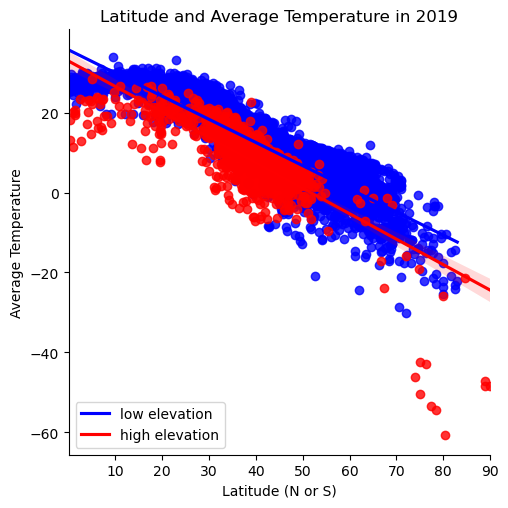

In [20]:
sns.lmplot(x='latabs', y='avgtemp', hue='elevation_group', palette=dict(low='blue', high='red'), legend_out=False, data=landtemps)
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature')
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title('Latitude and Average Temperature in 2019')
plt.tight_layout() # 여백(padding) 적절히 조정
plt.show()

* ↑ 위의 차트 해석 : 고지대 관측소를 나타내는 직선이 y절편이 더 아래에 있으며(평균 온도 더 낮음), 더 가파른 음의 기울기를 보임  
   
     
* tight_layout()의 기능  
  
    plt.tight_layout(pad=2.0)
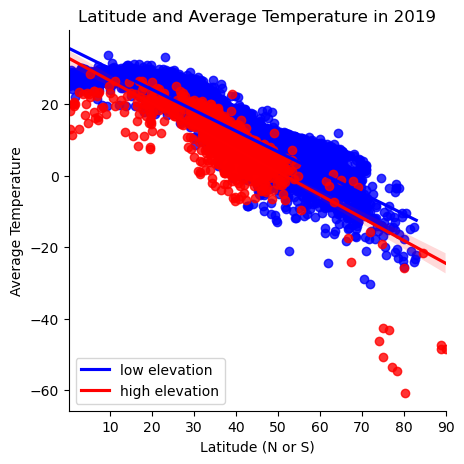
    plt.tight_layout(pad=0.4)
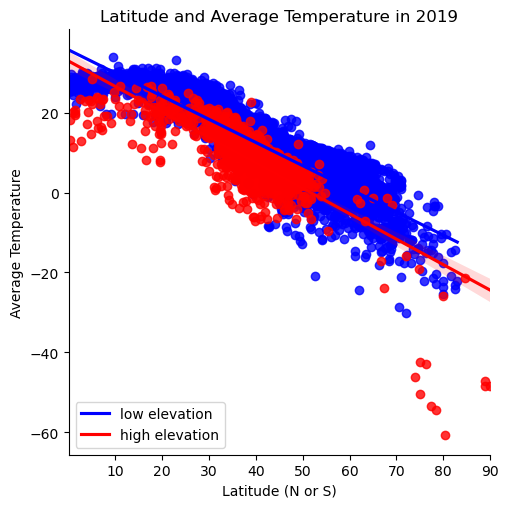 

# Line plot
일정 시간 간격(interval)에 걸쳐 연속변수 값을 시각화  (단, 구간 수가 적으면 막대 차트 사용 권장됨)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
coviddaily = pd.read_csv('data/coviddaily720.csv', parse_dates=['casedate']) # 일일 확진자 수 

In [27]:
# 1. look around
coviddaily.sample(2, random_state=1)

,iso_code,casedate,location,continent,new_cases,new_deaths,population,pop_density,median_age,gdp_per_capita,hosp_beds,region
2478,BRB,2020-06-11,Barbados,North America,4.00,0.00,"287,371.00",664.46,39.80,"16,978.07",5.80,Caribbean
9526,FRA,2020-02-16,France,Europe,0.00,0.00,"65,273,512.00",122.58,42.00,"38,605.67",5.98,Western Europe


In [47]:
# 2. calculate new cases and new deaths by day
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate'])[['new_cases','new_deaths']].sum().reset_index()

coviddailytotals.head(7)

,casedate,new_cases,new_deaths
0,2020-02-01,"2,120.00",46.00
1,2020-02-02,"2,608.00",46.00
2,2020-02-03,"2,818.00",57.00
3,2020-02-04,"3,243.00",65.00
4,2020-02-05,"3,897.00",66.00
5,2020-02-06,"3,741.00",72.00
6,2020-02-07,"3,177.00",73.00


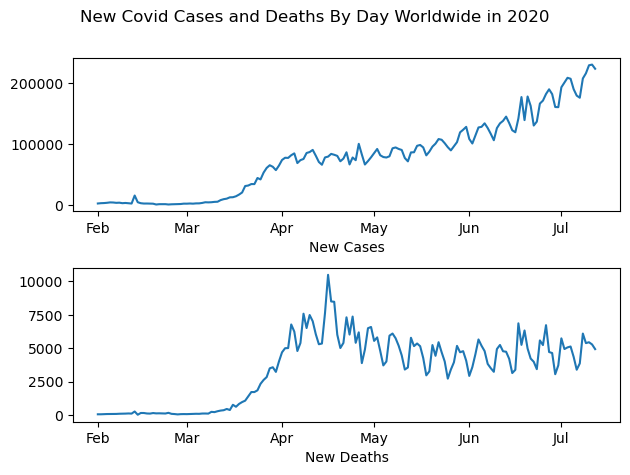

In [59]:
# 3. line plots - new cases and new deaths by day
fig = plt.figure()
plt.suptitle('New Covid Cases and Deaths By Day Worldwide in 2020')

ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter('%b'))
ax1.set_xlabel('New Cases')

ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter('%b'))
ax2.set_xlabel('New Deaths')

plt.tight_layout()
fig.subplots_adjust(top=0.88) # 최상단 메인 제목과 차트 사이의 간격
plt.show()

* **subplot()** : 여러 개의 그래프를 하나의 그림에 나타내도록 하는 함수임 
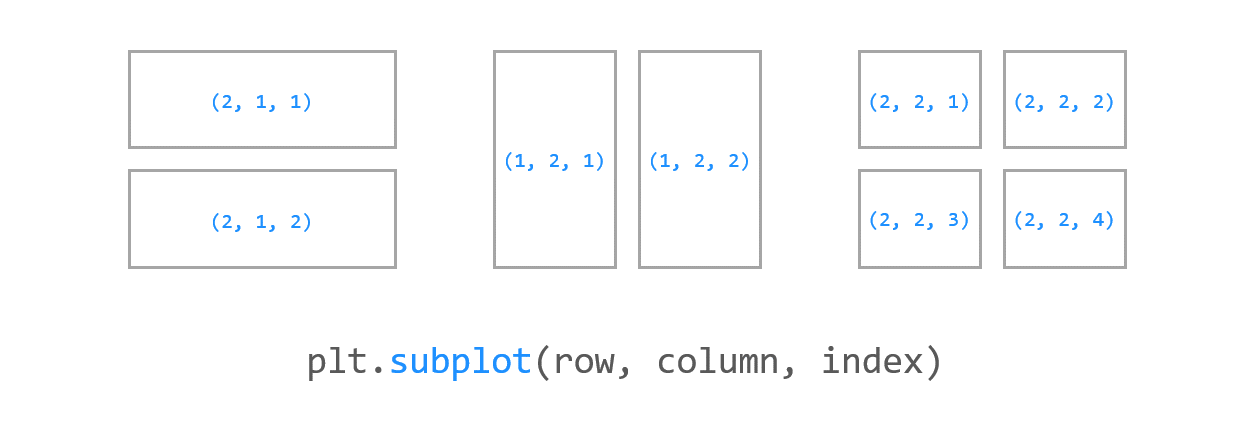
(그림 출처 : https://codetorial.net/matplotlib/subplot.html)  
  
  
    
* **중간 과정**  
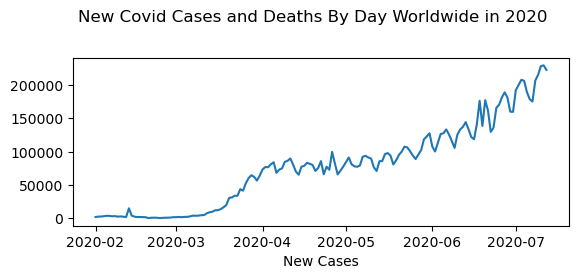  
set_major_formatter 사용 시  
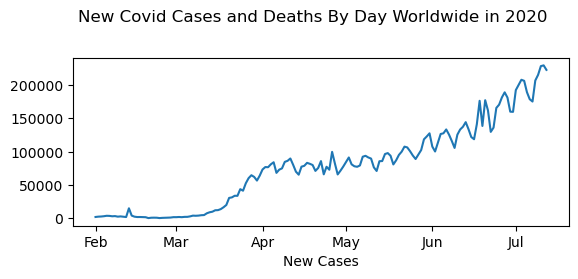
plt.tight_layout() 사용 시
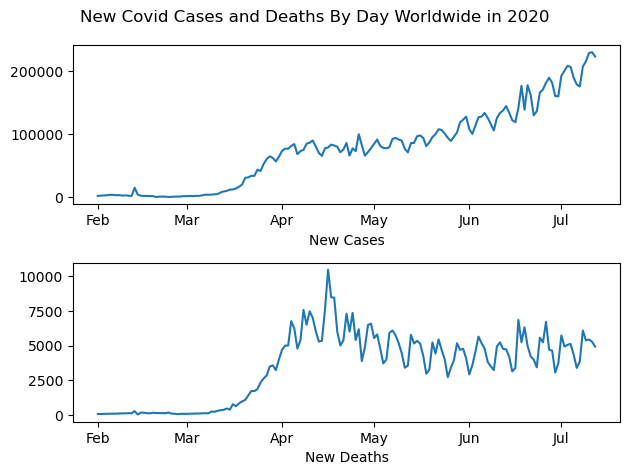

In [63]:
# 4. calculate new cases and new deaths by region and day
regiontotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
    groupby(['casedate','region'])[['new_cases','new_deaths']].\
    sum().reset_index()

regiontotals.head(10)

,casedate,region,new_cases,new_deaths
0,2020-02-01,Caribbean,0.00,0.00
1,2020-02-01,Central Asia,0.00,0.00
2,2020-02-01,East Asia,"2,110.00",46.00
3,2020-02-01,Eastern Europe,2.00,0.00
4,2020-02-01,North Africa,0.00,0.00
5,2020-02-01,North America,2.00,0.00
6,2020-02-01,Oceania / Aus,2.00,0.00
7,2020-02-01,South America,0.00,0.00
8,2020-02-01,South Asia,0.00,0.00
9,2020-02-01,West Africa,0.00,0.00


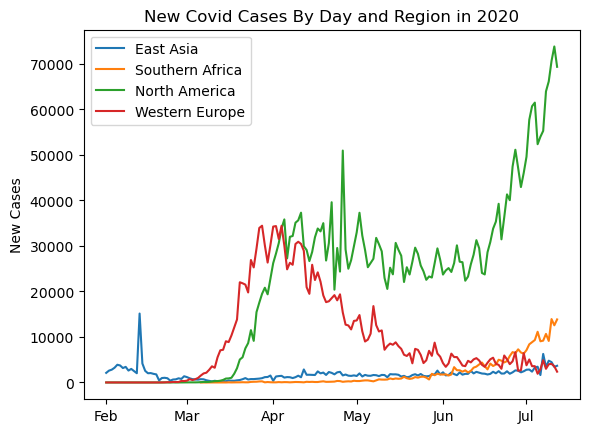

In [64]:
# 5. line plots - new cases by selected regions
showregions = ['East Asia','Southern Africa','North America','Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.region==showregions[j],['casedate','new_cases']] # 선택 지역의 신규 확진자 수
  plt.plot(rt.casedate, rt.new_cases, label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

# Heatmap

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate']) # Covid-19 총계 데이터

In [67]:
# 1. correlation matrix
corr = covidtotals.corr()
corr[['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.00,0.93,0.23,0.26
total_deaths,0.93,1.00,0.20,0.41
total_cases_pm,0.23,0.20,1.00,0.49
total_deaths_pm,0.26,0.41,0.49,1.00
population,0.34,0.28,-0.04,-0.00
pop_density,-0.03,-0.03,0.08,0.02
median_age,0.12,0.17,0.22,0.38
gdp_per_capita,0.13,0.16,0.58,0.37
hosp_beds,-0.01,-0.01,0.02,0.09


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


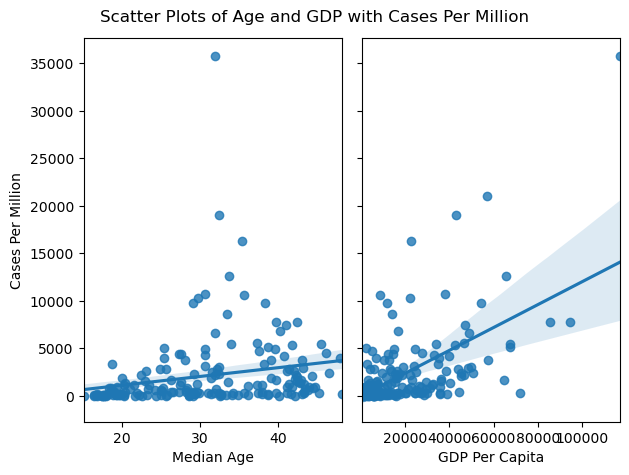

In [71]:
# 1. scatter plots
fig, axes = plt.subplots(1,2, sharey=True) # subplots : share y-axis
sns.regplot(covidtotals.median_age, covidtotals.total_cases_pm, ax=axes[0])
sns.regplot(covidtotals.gdp_per_capita, covidtotals.total_cases_pm, ax=axes[1])
axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

* 중간 과정  
fig, axes = plt.subplots(1,2, sharey=True)
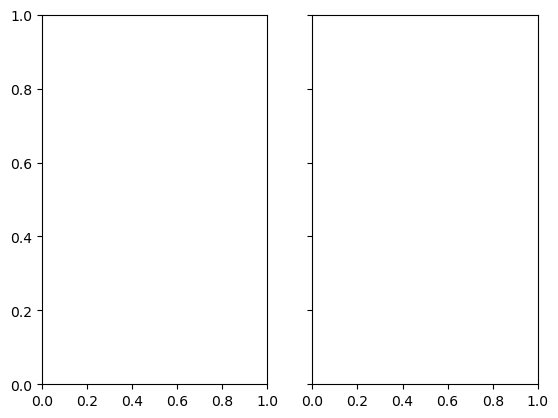
sns.regplot(covidtotals.median_age, covidtotals.total_cases_pm, ax=axes[0])  
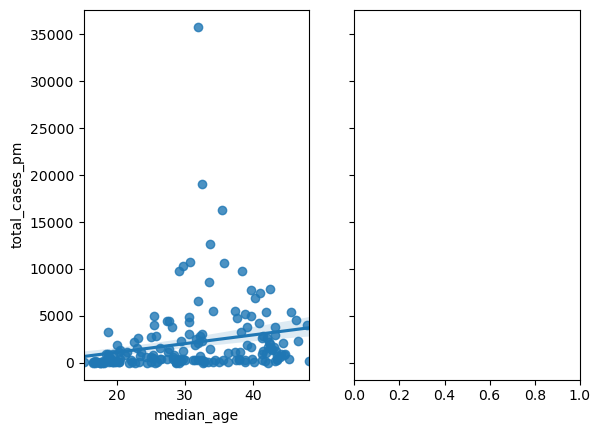
sns.regplot(covidtotals.gdp_per_capita, covidtotals.total_cases_pm, ax=axes[1])
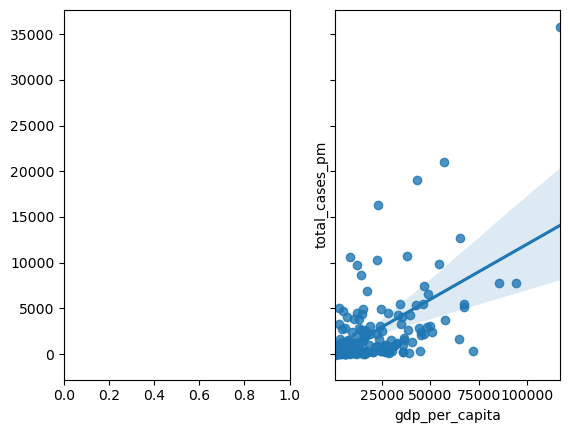

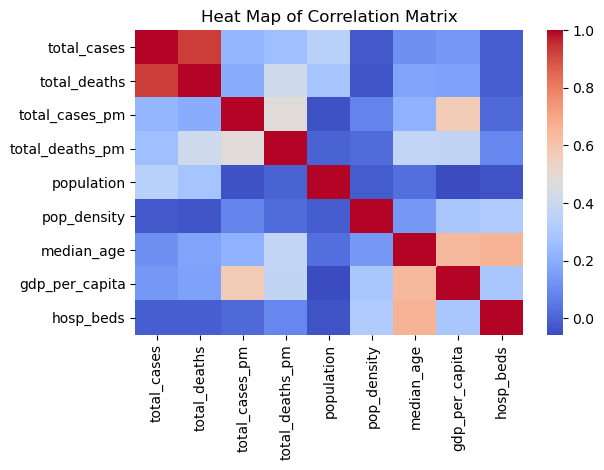

In [73]:
# 3. heat map
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()